## Imports and settings


In [26]:
# !pip install m3_learning
# 

In [1]:
import sys
import glob
import os
sys.path.append('./../')
sys.path.append('./../../src/')
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
import torch
import h5py
from ipywidgets import interact
from pprint import pprint

# import nn
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.viz.Movies import make_movie
from m3_learning.util.file_IO import download_and_unzip

from m3_learning.nn.STEM_AE_multimodal.Dataset import STEM_EELS_Dataset
from m3_learning.nn.STEM_AE_multimodal.Viz import Viz_Multimodal
from m3_learning.nn.STEM_AE_multimodal.STEM_AE import ConvAutoencoder_Multimodal

2024-02-13 05:19:03.599661: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 05:19:03.630245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 05:19:03.630271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 05:19:03.632017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 05:19:03.638702: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 05:19:03.639177: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Specify the filename and the path to save the file
save_path = './../../../../Northwestern_link/Northwestern_Multimodal'
fig_path = save_path + "_Figures/"

# builds the printer object
printing = printer(basepath=fig_path,fileformats=['png'])

# Set the style of the plots
set_style("printing")

# Set the random seed for reproducibility
random_seed(seed=42)

%matplotlib inline

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Domains 

### Peek

In [9]:
diffraction_files = glob.glob(f'{save_path}/*/diff*/Diffraction SI.dm4')
eels_files = glob.glob(f'{save_path}/*/eels*/Diffraction SI.dm4')

In [57]:
stem_path_list = glob.glob(f'{save_path}/*/diff*/Diffraction SI.dm4')

In [75]:
s.data.shape

(128, 128, 1024)

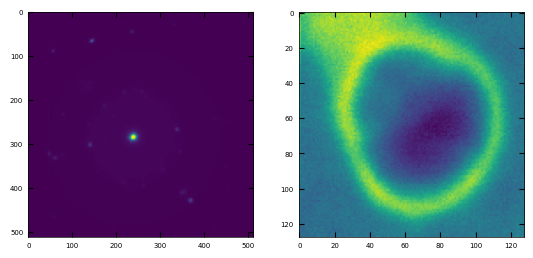

In [31]:
filename = '/home/m3learning/Northwestern/m3_learning/m3_learning/Northwestern_Multimodal/TRI-8c-5-AuCo/diff-01/Diffraction SI.dm4'


s = hs.load(filename)
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.log(s.data+1).mean(axis=(0,1)))
ax[1].imshow(np.log(s.data+1).mean(axis=(2,3)))

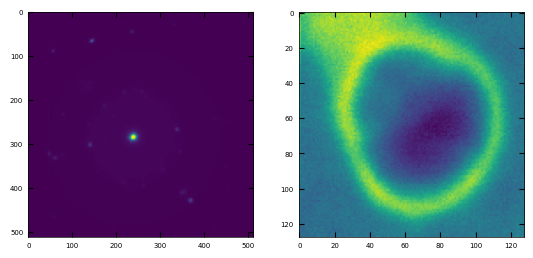

In [19]:
filename = '/home/m3learning/Northwestern/m3_learning/m3_learning/Northwestern_Multimodal/TRI-8c-5-AuCo/diff-01/Diffraction SI.dm4'


s = hs.load(filename)
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.log(s.data+1).mean(axis=(0,1)))
ax[1].imshow(np.log(s.data+1).mean(axis=(2,3)))

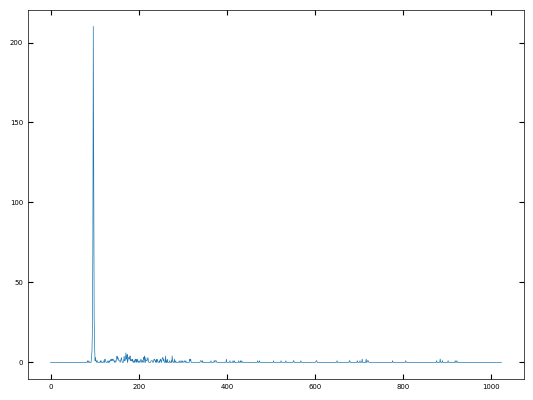

In [124]:
filename = '/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-02/EELS LL SI.dm4'


t = hs.load(filename)
plt.plot(t.data[0,0])

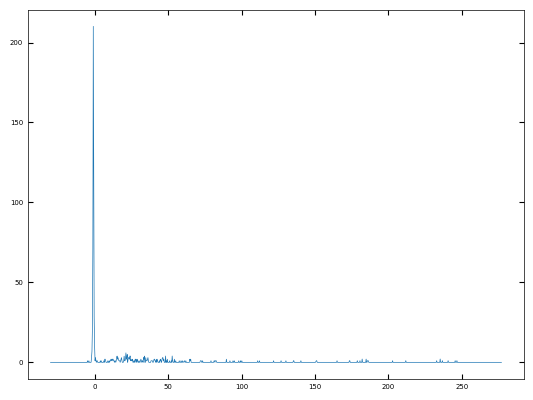

In [77]:
plt.plot(llx,s.data[0,0])

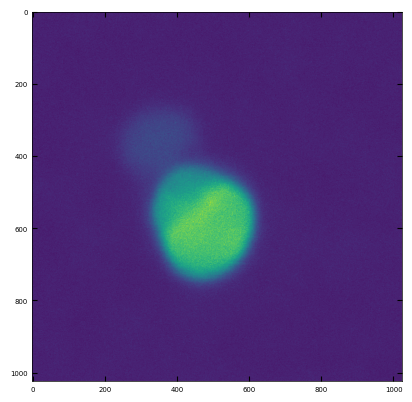

In [37]:
filename = '/home/m3learning/Northwestern/m3_learning/m3_learning/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-01/ADF Image (SI Survey).dm4'


s = hs.load(filename)
plt.imshow(s.data)

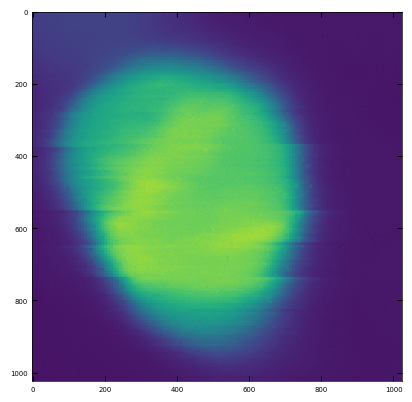

In [38]:
filename = '/home/m3learning/Northwestern/m3_learning/m3_learning/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-01/ADF Image.dm4'


s = hs.load(filename)
plt.imshow(s.data)

### Loads the Dataset

save in format (save_folder)/particles/instrument/composition/SI data (#)/Diffraction SI.dm4 for correct data processing

In [3]:
dset = STEM_EELS_Dataset(save_path, 
                 EELS_roi={'LL':[(-31+15.5,276)], 'HL': [(501+15.5,809)]},
                 overwrite_diff=False,
                 overwrite_eels=False,)

fetching metadata...


  0%|          | 0/29 [00:00<?, ?it/s]

 41%|████▏     | 12/29 [00:02<00:01,  9.08it/s]

bad:
	 ./../../../../Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/diff-12/Diffraction SI.dm4
	 ./../../../../Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-12/EELS LL SI.dm4
	 ./../../../../Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-12/EELS HL SI.dm4


 97%|█████████▋| 28/29 [00:04<00:00,  6.35it/s]


27 valid samples

getting spectral axis labels...
fitting scalers...
	Diffraction finished: 19.012423038482666 s
	EELS finished 2.150284767150879 s
finding brightfield indices...


100%|██████████| 27/27 [00:30<00:00,  1.12s/it]


finding High Loss background spectrum...


100%|██████████| 27/27 [00:06<00:00,  4.41it/s]

done


In [10]:
# test __get_item__
index,img,spec = dset[128*128+1]
[a,b] = dset.meta['eels_axis_labels']

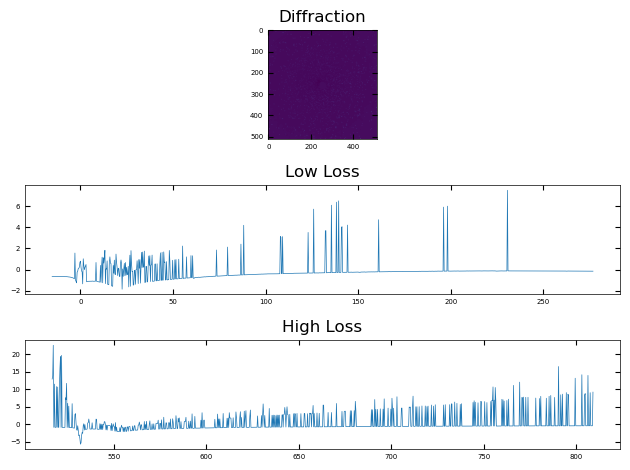

In [12]:
fig, axs = plt.subplots(3)
axs[0].imshow(img.squeeze())
axs[0].set_title('Diffraction')
axs[1].plot(dset.raw_x_labels[a[0]:a[1]+1,a[2]], spec[a[2]])
axs[1].set_title('Low Loss')
axs[2].plot(dset.raw_x_labels[b[0]:b[1]+1,b[2]], spec[b[2]])
axs[2].set_title('High Loss')
fig.tight_layout()

### Visualizes the Raw Data


In [4]:
# instantiates the visualization class
viz = Viz_Multimodal(printer=printing, labelfigs_=True)
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm", "channel": -1}

In [6]:
# # TODO: fix the bright/darkfield viz, and the avg. By Particle.
for i in range(len(dset)):
    viz.STEM_raw_and_virtual(
        dset,i,
        scalebar_=True,
    )

AttributeError: 'Viz_Multimodal' object has no attribute 'h5_name'

In [12]:
# # TODO: Do masking by particle. Record location/radius
# # TODO: fix the bright/darkfield viz, and the avg. By Particle.
# # bright_field_ = bbox
# # # dark_field_ = (dx1,dx2,dy1,dy2)
# filename = "STEM_raw_and_virtual_particle_62"
# viz.STEM_raw_and_virtual(
#     domain,
#     # bright_field_=bright_field_,
#     dark_field_=dark_field_,
#     scalebar_=True,
#     datapath=f'{save_path}/SI data (*)',
#     shape_=domain.data.shape,
# )

### Builds the Neural Network Model


In [5]:
# bout 1 min 6 sec
channels_1D = dset.shape[1][1] # number of channels
encoder_step_size_1D = dset.shape[1][-1] # length of eels spectrum
encoder_step_size_2D = dset.shape[0][-2:] # original shape opf diffraction pattern

pooling_list_1D = [5, 5, 3] # 975 --> 13
pooling_list_2D = [4, 4, 4] # 512,512 --> 8,8

decoder_step_size_1D = 39
decoder_step_size_2D = [8, 8]

upsampling_list_1D = [5,5]
upsampling_list_2D = [8, 8]

embedding_size_1D = 13*2 # from flattening channels but you can choose whatever you want
embedding_size_2D = 32 # you can shoose whatever you want
embedding_size = 32


conv_size_1D = 128
conv_size_2D = 128
attn_heads = 3

# set device to load model
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"

model = ConvAutoencoder_Multimodal(
            encoder_step_size_1D,
            encoder_step_size_2D,
            pooling_list_1D,
            pooling_list_2D,
            decoder_step_size_1D,
            decoder_step_size_2D,
            upsampling_list_1D,
            upsampling_list_2D,
            embedding_size_1D,
            embedding_size_2D,
            embedding_size,
            channels_1D,
            conv_size_1D,
            conv_size_2D,
            device,
            attn_heads,
            learning_rate=3e-5,
        )


### Trains or Loads Pretrained Weights


In [5]:
# load weights?
model.load_weights(
 '/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/Combined_all_samples/(2024-02-11)_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:6.8586.pkl'
 
 
 )

Unable to open file (bad object header version number)
Embedding and affines not opened
[Errno 2] Unable to open file (unable to open file: name = './Combined_all_samples/generated.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)
Generated not opened


In [9]:
h=model.open_embedding_h()

In [10]:
list(h.keys())

['embedding_temp', 'rotation_temp', 'scaleshear_temp', 'translation_temp']

In [6]:
st = 4
for ep in np.arange(0,100,st):
    model.Train(
        dset,
        coef_1=1e-5*ep,
        coef_2=1e-5*ep,
        epoch_=ep,
        epochs=st,
        with_scheduler=False,
        folder_path="Combined_all_samples",
        batch_size=16, # max 16 on h100
        save_emb_every=1
    )

Epoch: 001/004, getting embedding
.............................
Created empty h5 embedding datasets to fill during training


  0%|          | 102/31869 [01:13<6:19:23,  1.40it/s]

In [11]:
model.checkpoint

'/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/Combined_all_samples/(2024-02-11)_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:6.8586.pkl'

In [7]:
# # checkpoint = {
# #     "net": model.autoencoder.state_dict(),
# #     'optimizer': model.optimizer.state_dict(),
# #     "epoch": 0,
# #     "encoder_1D": model.encoder_1D.state_dict(),
# #     "encoder_2D": model.encoder_2D.state_dict(),
# #     'decoder_1D': model.decoder_1D.state_dict(),
# #     'decoder_2D': model.decoder_2D.state_dict(),
# # }

# # lr_ = format(model.optimizer.param_groups[0]['lr'], '.5f')
# # file_path = f'./Combined_all_samples/2023_2_1_' +\
# #     f'epoch:{0:04d}_l1coef:{0:.4f}'+'_lr:1e-4' +\
# #     f'_trainloss:{7.9609:.4f}.pkl'
# # torch.save(checkpoint, file_path)
# file_path = model.checkpoint
# h = model.embedding.file
# check = file_path.split('/')[-1][:-4]
# h[f'embedding_{check}'] = h[f'embedding_'] # combined embedding
# h[f'scaleshear_{check}'] = h[f'scaleshear_']
# h[f'rotation_{check}'] = h[f'rotation_'] 
# h[f'translation_{check}'] = h[f'translation_']
# model.embedding = h[f'embedding_{check}']
# model.scale_shear = h[f'scaleshear_{check}']           
# model.rotation = h[f'rotation_{check}']         
# model.translation = h[f'translation_{check}']
# del h[f'embedding_']         
# del h[f'scaleshear_']          
# del h[f'rotation_']          
# del h[f'translation_']
# h.flush()
# # h.close()

### Computes the Embeddings


In [7]:
model.checkpoint

'./Combined_all_samples/(2024-02-05)_epoch:0004_l1coef:0.0000_lr:0.00003_trainloss:6.9872.pkl'

In [7]:
# run if you did not autosave embedding (takes about 1:15 minutes on h100, or 2.5 hr on titan)
model.get_embedding(dset, batch_size=16, no_calculate=False)

  0%|          | 0/31869 [00:00<?, ?it/s]

100%|██████████| 31869/31869 [1:33:43<00:00,  5.67it/s]


### Visualizes the Embeddings


In [10]:
viz.channels = [i for i in range(model.embedding_size)]
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm"}
viz.model = model
viz.embeddings(
    dset.meta,
    mod=4,
    scalebar_=viz.scalebar_,
    savefolder='emb_affine_epoch_/'
    )

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [03:29<00:00,  7.78s/it]


In [11]:
# Visualize affine transforms
viz.affines(
    dset.meta,
    scalebar_=viz.scalebar_,
    figsize=(5, 8),
    savefolder='emb_affine_epoch_/'
    )

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [01:14<00:00,  2.77s/it]


### Clustering

In [12]:
scaled_emb_affines = model.stack_emb_affines()

Getting scree plot...


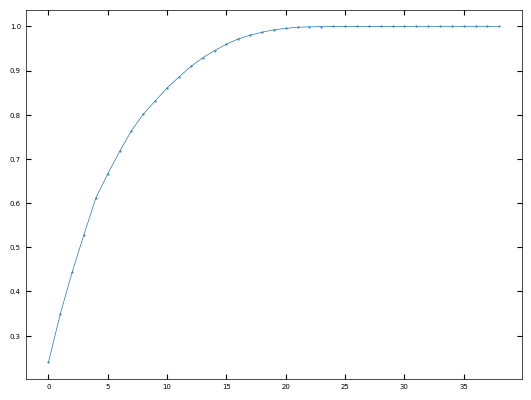

PCA with 20 components...
Getting elbow plot...


100%|██████████| 55/55 [00:29<00:00,  1.86it/s]


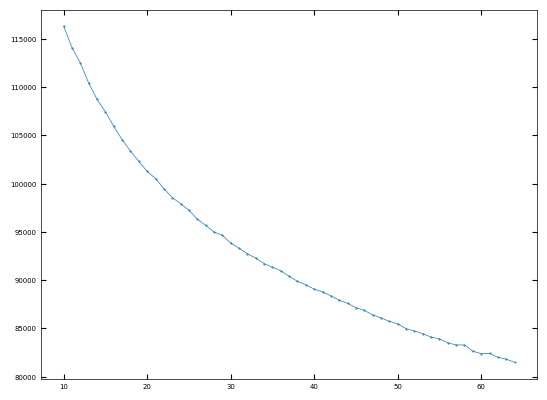

Clustering with 30 clusters...
Done


In [13]:
# will create scree and elbow plots if you aren't sure how many components/clusters are needed

# cluster_list,labels = model.get_clusters(dset,scaled_emb_affines,n_components=25,n_clusters=20)

cluster_list,labels = model.get_clusters(dset,scaled_emb_affines)

### visualize clusters

In [16]:
model.embedding_size


32

In [15]:
viz.printer.basepath

'./../../../../Northwestern_link/Northwestern_Multimodal_Figures/'

In [14]:
viz.clustered_images(dset,cluster_list,labels,
                     save_folder='clustered_30_epoch_/',
                     printer = viz.printer)

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:13<00:00,  1.94it/s]


### Generates Data from the Latent Space


In [19]:
h = model.open_embedding_h()

In [22]:
# checkpoint = '/home/m3learning/Northwestern/m3_learning/m3_learning/papers/HE_nanoparticles/Combined_all_samples/(2023-08-21)_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.6229.pkl'

# embedding = model.embedding
# channels = []
# for i in range(32):
#     if embedding[:,i].max()>0.03: channels.append(i)
# channels

# viz.channels = [i for i in range(32) if (model.embedding[:,i]).any()]
# ranges = []
# for c in channels:
#     ranges.append([embedding[:,c].min(),embedding[:,c].max()])
    
# model.embedding = embedding
viz.model = model
# folder_name = "Generator_of_epoch_all_ch"

In [24]:
# # folder_name = "Generator_of_epoch_6_all_ch"
# model.generate_range(dset.meta, model.checkpoint,channels=viz.channels,
#                                 generator_iters=25,averaging_number=50,
#                                 overwrite=True)

0 AgCu(1)


100%|██████████| 25/25 [00:09<00:00,  2.74it/s]


1 AgCu(2)


100%|██████████| 25/25 [00:04<00:00,  5.90it/s]


2 AgCu(3)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


3 AgCu(5)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


4 AgCu(6)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


5 AgCu(9)


100%|██████████| 25/25 [00:01<00:00, 14.21it/s]


6 AgCu(10)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


7 AgCu(11)


100%|██████████| 25/25 [00:01<00:00, 14.19it/s]


8 AgCu(13)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


9 AgCu(14)


100%|██████████| 25/25 [00:04<00:00,  5.92it/s]


10 AgCu(15)


100%|██████████| 25/25 [00:04<00:00,  5.94it/s]


11 AgCu(16)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


12 AgCu(17)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


13 AgCu(18)


100%|██████████| 25/25 [00:04<00:00,  5.91it/s]


14 AgCu(19)


100%|██████████| 25/25 [00:04<00:00,  5.96it/s]


15 AgCu(20)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


16 AgCu(21)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


17 AgCu(22)


100%|██████████| 25/25 [00:01<00:00, 14.34it/s]


18 AgCu(23)


100%|██████████| 25/25 [00:04<00:00,  6.01it/s]


19 AgCu(24)


100%|██████████| 25/25 [00:04<00:00,  5.96it/s]


20 AgCu(26)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


21 AgCu(41)


100%|██████████| 25/25 [00:01<00:00, 14.30it/s]


22 AgCu(42)


100%|██████████| 25/25 [00:01<00:00, 14.27it/s]


23 AgCu(43)


100%|██████████| 25/25 [00:01<00:00, 14.23it/s]


24 AgCu(44)


100%|██████████| 25/25 [00:01<00:00, 14.27it/s]


25 AgCu(45)


100%|██████████| 25/25 [00:01<00:00, 14.28it/s]


26 AgCu(46)


100%|██████████| 25/25 [00:01<00:00, 14.21it/s]


27 AgCu(48)


100%|██████████| 25/25 [00:01<00:00, 14.30it/s]


28 AgCu(50)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


29 AgCu(53)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


30 AgCu(54)


100%|██████████| 25/25 [00:01<00:00, 14.24it/s]


31 Au30Ag10Co20Ni40(62)


100%|██████████| 25/25 [00:01<00:00, 14.24it/s]


32 Au30Ag10Co20Ni40(63)


100%|██████████| 25/25 [00:01<00:00, 14.27it/s]


33 Au30Ag10Co20Ni40(64)


100%|██████████| 25/25 [00:01<00:00, 14.26it/s]


34 Au30Ag10Co20Ni40(65)


100%|██████████| 25/25 [00:01<00:00, 14.30it/s]


35 Au30Ag10Co20Ni40(66)


100%|██████████| 25/25 [00:04<00:00,  5.99it/s]


36 Au30Ag10Co20Ni40(67)


100%|██████████| 25/25 [00:04<00:00,  5.98it/s]


37 Au30Ag10Co20Ni40(68)


100%|██████████| 25/25 [00:04<00:00,  6.00it/s]


38 Au30Ag10Co20Ni40(69)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


39 Au30Ag10Co20Ni40(70)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


40 Au30Ag10Co20Ni40(71)


100%|██████████| 25/25 [00:04<00:00,  5.95it/s]


41 Au30Cu20Co20Ni30(1)


100%|██████████| 25/25 [00:01<00:00, 14.10it/s]


42 Au30Cu20Co20Ni30(2)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


43 Au30Cu20Co20Ni30(6)


100%|██████████| 25/25 [00:01<00:00, 14.32it/s]


44 Au30Cu20Co20Ni30(7)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


45 Au30Cu20Co20Ni30(8)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


46 Au30Cu20Co20Ni30(9)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


47 Au30Cu20Co20Ni30(10)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


48 Au30Cu20Co20Ni30(11)


100%|██████████| 25/25 [00:04<00:00,  5.97it/s]


49 Au30Cu20Co20Ni30(12)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


50 Au30Cu20Co20Ni30(13)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


51 Au30Cu20Co20Ni30(14)


100%|██████████| 25/25 [00:01<00:00, 14.09it/s]


52 Au30Cu20Co20Ni30(15)


100%|██████████| 25/25 [00:01<00:00, 14.14it/s]


53 Au30Cu20Co20Ni30(16)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


54 Au30Cu20Co20Ni30(17)


100%|██████████| 25/25 [00:01<00:00, 14.14it/s]


55 Au30Cu20Co20Ni30(18)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


56 Au30Cu20Co20Ni30(19)


100%|██████████| 25/25 [00:04<00:00,  5.97it/s]


57 Au30Cu20Co20Ni30(20)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


58 Au30Cu20Co20Ni30(21)


100%|██████████| 25/25 [00:01<00:00, 14.19it/s]


59 Au30Cu20Co20Ni30(22)


100%|██████████| 25/25 [00:01<00:00, 14.34it/s]


60 Au30Cu20Co20Ni30(23)


100%|██████████| 25/25 [00:04<00:00,  5.98it/s]


61 Au30Cu20Co20Ni30(24)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


62 Au30Cu20Co20Ni30(25)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


63 Au30Cu20Co20Ni30(27)


100%|██████████| 25/25 [00:01<00:00, 14.22it/s]


64 Au30Cu20Co20Ni30(28)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


65 Au30Cu20Co20Ni30(29)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


66 Au30Cu20Co20Ni30(30)


100%|██████████| 25/25 [00:04<00:00,  5.93it/s]


67 Au30Cu20Co20Ni30(31)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


68 Au30Cu20Co20Ni30(32)


100%|██████████| 25/25 [00:01<00:00, 14.23it/s]


69 Au30Cu20Co20Ni30(33)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


70 Au30Cu20Co20Ni30(34)


100%|██████████| 25/25 [00:04<00:00,  5.99it/s]


71 Au30Cu20Co20Ni30(35)


100%|██████████| 25/25 [00:01<00:00, 14.22it/s]


72 Au30Cu20Co20Ni30(36)


100%|██████████| 25/25 [00:01<00:00, 14.22it/s]


73 Au30Cu20Co20Ni30(37)


100%|██████████| 25/25 [00:04<00:00,  5.91it/s]


74 Au30Cu20Co20Ni30(38)


100%|██████████| 25/25 [00:01<00:00, 14.08it/s]


75 Au30Cu20Co20Ni30(40)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


76 Au30Cu20Co20Ni30(41)


100%|██████████| 25/25 [00:01<00:00, 14.19it/s]


77 Au30Cu20Co20Ni30(42)


100%|██████████| 25/25 [00:04<00:00,  5.97it/s]


78 Au30Cu20Co20Ni30(43)


100%|██████████| 25/25 [00:04<00:00,  6.04it/s]


79 Au30Cu20Co20Ni30(44)


100%|██████████| 25/25 [00:01<00:00, 14.10it/s]


80 Au30Cu20Co20Ni30(45)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


81 Au30Cu20Co20Ni30(46)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


82 Au30Cu20Co20Ni30(49)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


83 Au30Cu20Co20Ni30(50)


100%|██████████| 25/25 [00:01<00:00, 14.09it/s]


84 Au30Cu20Co20Ni30(51)


100%|██████████| 25/25 [00:01<00:00, 14.11it/s]


85 Au30Cu20Co20Ni30(53)


100%|██████████| 25/25 [00:04<00:00,  5.91it/s]


86 Au30Cu20Co20Ni30(54)


100%|██████████| 25/25 [00:01<00:00, 14.11it/s]


87 Au30Cu20Co20Ni30(55)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


88 Au30Cu20Co20Ni30(56)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


89 Au30Cu20Co20Ni30(57)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


90 Au30Cu20Co20Ni30(58)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


91 Au30Cu20Co20Ni30(61)


100%|██████████| 25/25 [00:04<00:00,  5.81it/s]


92 AuCu(3)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


93 AuCu(4)


100%|██████████| 25/25 [00:01<00:00, 14.06it/s]


94 AuCu(5)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


95 AuCu(6)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


96 AuCu(7)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


97 AuCu(8)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


98 AuCu(9)


100%|██████████| 25/25 [00:04<00:00,  5.83it/s]


99 AuCu(10)


100%|██████████| 25/25 [00:01<00:00, 14.10it/s]


100 AuCu(11)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


101 AuCu(12)


100%|██████████| 25/25 [00:01<00:00, 14.08it/s]


102 AuCu(13)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


103 AuCu(14)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


104 AuCu(16)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


105 AuCu(18)


100%|██████████| 25/25 [00:04<00:00,  5.94it/s]


106 AuCu(19)


100%|██████████| 25/25 [00:01<00:00, 14.09it/s]


107 AuCu(20)


100%|██████████| 25/25 [00:01<00:00, 14.08it/s]


108 AuCu(21)


100%|██████████| 25/25 [00:01<00:00, 14.06it/s]


109 AuCu(22)


100%|██████████| 25/25 [00:04<00:00,  5.94it/s]


110 AuCu(24)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


111 AuCu(25)


100%|██████████| 25/25 [00:01<00:00, 14.07it/s]


112 AuCu(26)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


113 AuCu(28)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


114 AuCu(31)


100%|██████████| 25/25 [00:01<00:00, 14.03it/s]


115 AuCu(32)


100%|██████████| 25/25 [00:01<00:00, 14.11it/s]


116 AuCu(33)


100%|██████████| 25/25 [00:04<00:00,  5.95it/s]


117 AuCu(34)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


118 AuCu(35)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


119 AuCu(36)


100%|██████████| 25/25 [00:04<00:00,  5.89it/s]


120 AuCu(37)


100%|██████████| 25/25 [00:01<00:00, 14.03it/s]


121 AuCu(38)


100%|██████████| 25/25 [00:01<00:00, 13.99it/s]


122 AuCu(39)


100%|██████████| 25/25 [00:01<00:00, 14.07it/s]


123 AuCu(40)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


### Visualize generated images

In [40]:
len(viz.channels)

29

In [48]:
hg = model.open_generated_h()


In [49]:
hg.keys()

<KeysViewHDF5 ['(2023-08-21)_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.6229']>

In [83]:
h=model.open_embedding_h()
h.close()
h=model.open_generated_h()
h.close()

In [ ]:
printing

In [62]:
folder_name

'Generator_of_epoch_6_all_ch'

In [77]:
p_name='AuCu(40)'

In [78]:
f'{printing.basepath}{folder_name}/{p_name}/*'


'./../../Northwestern_Figures/Generator_of_epoch_6_all_ch/AuCu(40)/*'

In [79]:
existing = [item.split('/')[-1] for item in glob.glob(f'{printing.basepath}{folder_name}/{p_name}/*')]
# if p_name+'_embedding_maps.png' in existing:
#     print('skipping',savefolder+p_name+'_embedding_maps.png')
#     continue

In [80]:
existing

['0015_maps.png',
 '0014_maps.png',
 '0002_maps.png',
 '0022_maps.png',
 '0001_maps.png',
 '0013_maps.png',
 '0004_maps.png',
 '0010_maps.png',
 '0018_maps.png',
 '0021_maps.png',
 '0016_maps.png',
 '0006_maps.png',
 '0017_maps.png',
 '0000_maps.png',
 '0003_maps.png',
 '0007_maps.png',
 '0024_maps.png',
 '0005_maps.png',
 '0008_maps.png',
 '0012_maps.png',
 '0011_maps.png',
 '0023_maps.png',
 '0009_maps.png',
 '0020_maps.png',
 '0019_maps.png']

[autoreload of nn.STEM_AE.Viz failed: Traceback (most recent call last):
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 315, in update_instances
    refs = gc.get_referrers(old)
           ^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


0 AgCu(1)


 80%|████████  | 20/25 [02:31<00:37,  7.59s/it]


KeyboardInterrupt: 

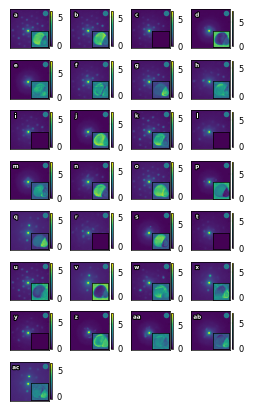

In [82]:
folder_name = "Generator_of_epoch_6_all_ch_1"
viz.generator_images( dset.meta, model.generated,
                     scaler=dset.scaler,
    folder_name=folder_name,
    figsize=(7.5,4),
    cbar_number_format="%.02d",
    shape_=(128,128,128,128),
    divider_=False,
    graph_layout=(len(viz.channels),4),
    labelfigs_=True
    )

### Builds a Movie


In [198]:
folder_name = "Generator_of_epoch_6_all_ch"


In [200]:
# Builds a Movie
folder = f"{fig_path}{folder_name}/"
# output_folder = "./movies_unscaled/"
output_folder = "./movies/"


for particle in dset.meta['particle_list']:
    # particle=particle.replace('_',' ')
    print(particle)
    make_movie(f"Generator {particle}", f'{folder}{particle}/', 
               output_folder, "png", 3)

AgCu(1)
AgCu(2)


libpng error: Read Error


AgCu(3)
AgCu(5)
AgCu(6)
AgCu(9)
AgCu(10)
AgCu(11)
AgCu(13)
AgCu(14)
AgCu(15)
AgCu(16)
AgCu(17)
AgCu(18)
AgCu(19)
AgCu(20)
AgCu(21)
AgCu(22)
AgCu(23)
AgCu(24)
AgCu(26)
AgCu(41)
AgCu(42)
AgCu(43)
AgCu(44)
AgCu(45)
AgCu(46)
AgCu(48)
AgCu(50)
AgCu(53)
AgCu(54)
Au30Ag10Co20Ni40(62)
Au30Ag10Co20Ni40(63)
Au30Ag10Co20Ni40(64)
Au30Ag10Co20Ni40(65)
Au30Ag10Co20Ni40(66)
Au30Ag10Co20Ni40(67)
Au30Ag10Co20Ni40(68)
Au30Ag10Co20Ni40(69)
Au30Ag10Co20Ni40(70)
Au30Ag10Co20Ni40(71)
Au30Cu20Co20Ni30(1)
Au30Cu20Co20Ni30(2)
Au30Cu20Co20Ni30(6)
Au30Cu20Co20Ni30(7)
Au30Cu20Co20Ni30(8)
Au30Cu20Co20Ni30(9)
Au30Cu20Co20Ni30(10)
Au30Cu20Co20Ni30(11)
Au30Cu20Co20Ni30(12)
Au30Cu20Co20Ni30(13)
Au30Cu20Co20Ni30(14)


IndexError: list index out of range

### Generate from specified embedding range

In [ ]:
g_folder = str(channels).replace(', ','_')[1:-1]

In [ ]:
g_folder

'0_1_4_7_8_10_14_17_19_22_25_28_31'

In [ ]:
fig_path

'./../../Northwestern/auagconi_aucuconi/2021_07_10_stela_80kV/Au30Ag10Co20Ni40_Figures/'

In [ ]:
# Builds a Movie
folder = f"{fig_path}/generator_{g_folder}"
output_folder = "./movies/"

In [ ]:
'generator_[1, 3, 8, 10, 11, 13, 15, 17, 22, 26]'

In [ ]:
# Builds a Movie
folder = f"{fig_path}/generator_{g_folder}"
output_folder = "./movies/"

# function to make the movie
make_movie("Domain Generator", folder, output_folder, "png", 3)